In [4]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import psycopg2
import matplotlib.ticker as ticker
import numpy as np
import smtplib
import seaborn as sns
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta

In [5]:
# Função para enviar e-mail com anexos
def enviar_email(dfs, paths_to_images):
    #Configurações de email
    remetente = 'kmk.052006@gmail.com'
    senha = 'lszu zozy kwjx sjbw'
    destinatario = 'kmk.052006@gmail.com'

    # Configuração de servidor SMTP
    servidor_smtp = 'smtp.gmail.com'
    porta_smtp = 587

    # Criando o corpo do email
    mensagem = MIMEMultipart()
    mensagem['From'] = remetente
    mensagem['To'] = destinatario
    mensagem['Subject'] = 'Relatório de Dados e Gráficos'

    # Adicionando o corpo do e-mail
    corpo_email = 'Arquivos em anexo. Veja o relatório e os gráficos.'
    mensagem.attach(MIMEText(corpo_email, 'plain'))

    # Adicionando DataFrames como anexos (CSV)
    for i, df in enumerate(dfs):
        df_csv = df.to_csv(index=False)
        attachment = MIMEText(df_csv)
        attachment.add_header('Content-Disposition', f'attachment; filename=dados_{i}.csv')
        mensagem.attach(attachment)

    # Adicionando imagens dos gráficos como anexos
    for i, img_path in enumerate(paths_to_images):
        with open(img_path, 'rb') as img:
            attachment = MIMEApplication(img.read(), _subtype='png')
            attachment.add_header('Content-Disposition', f'attachment; filename=grafico_{i}.png')
            mensagem.attach(attachment)

    # Conectando ao servidor SMTP e enviando o email
    try:
        with smtplib.SMTP(servidor_smtp, porta_smtp) as server:
            server.starttls()
            server.login(remetente, senha)
            server.sendmail(remetente, destinatario, mensagem.as_string())
        print('E-mail enviado com sucesso!')
    except Exception as e:
        print(f'Erro ao enviar e-mail: {str(e)}')

In [6]:
# Função para obter o período de data desejado (Convenio)
def obter_data_formatada(option):
    today = datetime.now()
    
    if option == 1:
        start_date = today
    elif option == 2:
        start_date = today - timedelta(days=15)
    elif option == 3:
        start_date = today - timedelta(days=30)
    elif option == 4:
        start_date = today - timedelta(days=180)
    elif option == 5:
        start_date = today - timedelta(days=365)
    else:
        raise ValueError("Opção inválida")
    
    end_date = today  # Data de fim é sempre hoje para essas opções
    return start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y')

# URL da API
base_url = 'https://api-dados-abertos.cearatransparente.ce.gov.br/transparencia/'

def main():
    print("Digite sua opção:")
    print("1 - Dia atual")
    print("2 - Últimos 15 dias")
    print("3 - Últimos 30 dias")
    print("4 - Últimos 180 dias")
    print("5 - Último ano")
    
    option = int(input("Opção: "))
    
    try:
        data_inicio, data_fim = obter_data_formatada(option)
        
        # Lista para armazenar os dados do convênio
        dados_convenio = []
        contador = 0
        
        # Loop para consulta de página (ajustado para apenas uma página conforme seu exemplo)
        for pagina in range(1, 2):  # Nota: range(1, 2) faz apenas uma iteração (página 1)
            contador += 1
            print(f'Consultando página: {contador}')
            
            # Construir a URL com os parâmetros de data
            url_pagina = f'{base_url}contratos/convenios?page={pagina}&data_assinatura_inicio={data_inicio}&data_assinatura_fim={data_fim}'
            
            # Fazer a chamada da API
            response = requests.get(url_pagina, headers={'accept': 'application/json'})
            
            # Verificar se a requisição foi bem-sucedida
            if response.status_code == 200:
                dados_pagina = response.json()
                print(f'Resposta da API na página {pagina}: {dados_pagina}')  # Debug da resposta
                
                if 'data' in dados_pagina:
                    dados_convenio.extend(dados_pagina['data'])
                else:
                    print(f'Nenhum dado retornado na página {pagina}')
            else:
                print(f'Erro na requisição: {response.status_code}, URL: {url_pagina}')
        
        print('Consulta concluída.')
        print(f'Dados coletados: {dados_convenio}')
        
        return dados_convenio
        
    except ValueError as e:
        print(e)
    except requests.RequestException as e:
        print(f"Erro ao fazer requisição à API: {e}")
        return []

if __name__ == "__main__":
    dados_convenio = main()
    if dados_convenio:
        convenio = pd.DataFrame(dados_convenio)
        print(convenio)
    else:
        print("Nenhum dado foi coletado.")



Digite sua opção:
1 - Dia atual
2 - Últimos 15 dias
3 - Últimos 30 dias
4 - Últimos 180 dias
5 - Último ano
Consultando página: 1
Resposta da API na página 1: {'sumary': {'total_pages': 31, 'current_page': '1', 'total_records': 754, 'records_per_page': 25}, 'data': [{'id': 554735, 'cod_concedente': '270001', 'cod_financiador': '881412', 'cod_gestora': '270401', 'cod_orgao': '27200004', 'cod_secretaria': '27000000', 'descricao_modalidade': 'USO INTERNO', 'descricao_objeto': 'Constitui objeto do presente TPC o reconhecimento e valorização de agentes culturais e/ou iniciativas do setor audiovisual por meio de premiação da iniciativa selecionada no Edital de Premiação Cultural - Fomento à Exibição, Preservação e Empresas do Audiovisual Cearense, conforme processo administrativo NUP: nº 27001.003181/2024-58.', 'descricao_tipo': 'CONVENIO.DESPESA', 'descricao_url': '20240610.1321255.Integra.CONVENIO.DESPESA.pdf', 'data_assinatura': '2024-06-10T00:00:00.000-03:00', 'data_processamento': '2024

In [7]:
# Função para obter o período de data desejado (Contrato)
def obter_data_formatada(option):
    today = datetime.now()
    
    if option == 1:
        start_date = today
    elif option == 2:
        start_date = today - timedelta(days=15)
    elif option == 3:
        start_date = today - timedelta(days=30)
    elif option == 4:
        start_date = today - timedelta(days=180)
    elif option == 5:
        start_date = today - timedelta(days=365)
    else:
        raise ValueError("Opção inválida")
    
    end_date = today  # Data de fim é sempre hoje para essas opções
    return start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y')

# URL da API
base_url = 'https://api-dados-abertos.cearatransparente.ce.gov.br/transparencia/'

def main():
    print("Digite sua opção:")
    print("1 - Dia atual")
    print("2 - Últimos 15 dias")
    print("3 - Últimos 30 dias")
    print("4 - Últimos 180 dias")
    print("5 - Último ano")
    
    option = int(input("Opção: "))
    
    try:
        data_inicio, data_fim = obter_data_formatada(option)
        
        # Lista para armazenar os dados do contrato
        dados_contrato = []
        contador = 0
        
        # Loop para consulta de página (ajustado para apenas uma página conforme seu exemplo)
        for pagina in range(1, 2):  # Nota: range(1, 2) faz apenas uma iteração (página 1)
            contador += 1
            print(f'Consultando página: {contador}')
            
            # Construir a URL com os parâmetros de data
            url_pagina = f'{base_url}contratos/contratos?page={pagina}&data_assinatura_inicio={data_inicio}&data_assinatura_fim={data_fim}'
            
            # Fazer a chamada da API
            response = requests.get(url_pagina, headers={'accept': 'application/json'})
            
            # Verificar se a requisição foi bem-sucedida
            if response.status_code == 200:
                dados_pagina = response.json()
                print(f'Resposta da API na página {pagina}: {dados_pagina}')  # Debug da resposta
                
                if 'data' in dados_pagina:
                    dados_contrato.extend(dados_pagina['data'])
                else:
                    print(f'Nenhum dado retornado na página {pagina}')
            else:
                print(f'Erro na requisição: {response.status_code}, URL: {url_pagina}')
        
        print('Consulta concluída.')
        print(f'Dados coletados: {dados_contrato}')
        
        return dados_contrato
        
    except ValueError as e:
        print(e)
    except requests.RequestException as e:
        print(f"Erro ao fazer requisição à API: {e}")
        return []

if __name__ == "__main__":
    dados_contrato = main()
    if dados_contrato:
        contrato = pd.DataFrame(dados_contrato)
        print(contrato)
    else:
        print("Nenhum dado foi coletado.")

Digite sua opção:
1 - Dia atual
2 - Últimos 15 dias
3 - Últimos 30 dias
4 - Últimos 180 dias
5 - Último ano
Consultando página: 1
Resposta da API na página 1: {'sumary': {'total_pages': 39, 'current_page': '1', 'total_records': 3848, 'records_per_page': 100}, 'data': [{'id': 555559, 'cod_concedente': '241311', 'cod_financiador': '6841', 'cod_gestora': '241311', 'cod_orgao': '24200204', 'cod_secretaria': '24000000', 'descricao_modalidade': 'PREGÃO ELETRÔNICO', 'descricao_objeto': 'Adesão a Ata de Registro de Preço n° 20484/2023, Pregão Eletrônico n° 0013/2023, cujo objeto é a aquisições de Material Médico Hospitalar - FIO DE SUTURA, para o HIAS.', 'descricao_tipo': 'DESPESA.SEM.INSTRUMENTO.CONTRATUAL', 'descricao_url': 'Sem Íntegra', 'data_assinatura': '2024-06-10T00:00:00.000-03:00', 'data_processamento': '2024-06-21T09:40:08.000-03:00', 'data_termino': '2024-12-31T00:00:00.000-03:00', 'flg_tipo': 52, 'isn_parte_destino': 26589, 'isn_sic': 1321688, 'num_spu': '24001.043973/2024-77', 'v

In [8]:
contrato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   id                                 100 non-null    int64 
 1   cod_concedente                     100 non-null    object
 2   cod_financiador                    100 non-null    object
 3   cod_gestora                        100 non-null    object
 4   cod_orgao                          100 non-null    object
 5   cod_secretaria                     100 non-null    object
 6   descricao_modalidade               100 non-null    object
 7   descricao_objeto                   100 non-null    object
 8   descricao_tipo                     100 non-null    object
 9   descricao_url                      100 non-null    object
 10  data_assinatura                    100 non-null    object
 11  data_processamento                 100 non-null    object
 12  data_term

In [9]:
# Concatenando os DataFrames
dados_concat = pd.concat([contrato, convenio], ignore_index=True)

In [10]:
# Criando um Dataframe com os dados concatenados
dados_concatenados = pd.DataFrame(dados_concat)

In [11]:
dados_concatenados.shape

(125, 60)

In [12]:
# Exibindo informações sobre o DataFrame concatenado
dados_concatenados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   id                                 125 non-null    int64 
 1   cod_concedente                     125 non-null    object
 2   cod_financiador                    125 non-null    object
 3   cod_gestora                        125 non-null    object
 4   cod_orgao                          125 non-null    object
 5   cod_secretaria                     125 non-null    object
 6   descricao_modalidade               125 non-null    object
 7   descricao_objeto                   125 non-null    object
 8   descricao_tipo                     125 non-null    object
 9   descricao_url                      125 non-null    object
 10  data_assinatura                    125 non-null    object
 11  data_processamento                 125 non-null    object
 12  data_ter

In [13]:
dados_concatenados.head(5)

,id,cod_concedente,cod_financiador,cod_gestora,cod_orgao,cod_secretaria,descricao_modalidade,descricao_objeto,descricao_tipo,descricao_url,...,data_publicacao_doe,descricao_nome_credor,isn_parte_origem,data_auditoria,data_termino_original,data_inicio,data_rescisao,confidential,gestor_contrato,data_finalizacao_prestacao_contas
0,555559,241311,6841,241311,24200204,24000000,PREGÃO ELETRÔNICO,Adesão a Ata de Registro de Preço n° 20484/202...,DESPESA.SEM.INSTRUMENTO.CONTRATUAL,Sem Íntegra,...,0001-01-01T00:00:00.000-02:34,POINT SUTURE DO BRASIL INDUSTRIA DE FIOS CIRUR...,321251,2024-06-19,2024-12-31T00:00:00.000-03:00,2024-06-10T00:00:00.000-03:00,None,False,None,None
1,557457,228292,29149,220001,22000000,22000000,DISPENSA,Gêneros de alimentação; EEEP MONSENHOR EXPEDIT...,CONTRATO,20240611.1321401.Integra.CONTRATO.pdf,...,2024-06-19T00:00:00.000-03:00,EDSON GUILHERME DE OLIVEIRA ME,436328,2024-06-17,2025-06-19T00:00:00.000-03:00,2024-06-19T00:00:00.000-03:00,None,False,ALEXANDRE MAGALHAES ROCHA,None
2,557466,241301,219593,241301,24200194,24000000,PREGÃO ELETRÔNICO,PROCEDENTE DA ATA DE REGISTRO DE PREÇO Nº 2023...,DESPESA.SEM.INSTRUMENTO.CONTRATUAL,Sem Íntegra,...,0001-01-01T00:00:00.000-02:34,PRISMA DISTRIBUIDORA DE PAPEIS LTDA,321260,2024-06-17,2024-12-31T00:00:00.000-03:00,2024-06-10T00:00:00.000-03:00,None,False,None,None
3,554740,241281,126835,241281,24200184,24000000,PREGÃO ELETRÔNICO,AQUISIÇÃO DE MATERIAL TECNICO HOSPITALAR - CON...,DESPESA.SEM.INSTRUMENTO.CONTRATUAL,Sem Íntegra,...,0001-01-01T00:00:00.000-02:34,ART MEDICA COM E REP PROD HOST LTDA,321261,2024-06-10,2024-12-31T00:00:00.000-03:00,2024-06-10T00:00:00.000-03:00,None,False,None,None
4,554748,240344,217751,240344,24200344,24000000,PREGÃO ELETRÔNICO,DESTINADO PARA COMPRA DE MATERIAL PERMANENTE- ...,DESPESA.SEM.INSTRUMENTO.CONTRATUAL,Sem Íntegra,...,0001-01-01T00:00:00.000-02:34,MOVENORD MOVEIS DO NORDESTE LTDA,330103,2024-06-10,2024-12-31T00:00:00.000-03:00,2024-06-10T00:00:00.000-03:00,None,False,None,None


In [14]:
dados_concatenados.columns

Index(['id', 'cod_concedente', 'cod_financiador', 'cod_gestora', 'cod_orgao',
       'cod_secretaria', 'descricao_modalidade', 'descricao_objeto',
       'descricao_tipo', 'descricao_url', 'data_assinatura',
       'data_processamento', 'data_termino', 'flg_tipo', 'isn_parte_destino',
       'isn_sic', 'num_spu', 'valor_contrato', 'isn_modalidade',
       'isn_entidade', 'tipo_objeto', 'num_spu_licitacao',
       'descricao_justificativa', 'valor_can_rstpg', 'data_publicacao_portal',
       'descricao_url_pltrb', 'descricao_url_ddisp', 'descricao_url_inexg',
       'cod_plano_trabalho', 'num_certidao', 'descriaco_edital',
       'cpf_cnpj_financiador', 'num_contrato', 'valor_original_concedente',
       'valor_original_contrapartida', 'valor_atualizado_concedente',
       'valor_atualizado_contrapartida', 'created_at', 'updated_at',
       'plain_num_contrato', 'calculated_valor_aditivo',
       'calculated_valor_ajuste', 'calculated_valor_empenhado',
       'calculated_valor_pago', 'c

In [15]:
dados_concatenados['calculated_valor_empenhado'] = pd.to_numeric(dados_concatenados['calculated_valor_empenhado'])
dados_concatenados['calculated_valor_pago'] = pd.to_numeric(dados_concatenados['calculated_valor_pago'])
dados_concatenados['valor_contrato'] = pd.to_numeric(dados_concatenados['valor_contrato'])


In [16]:
# Função para extrair a data e aplicar a data padrão se for NaN ou inválida
def extrair_data(data_hora):
    if pd.isna(data_hora) or not isinstance(data_hora, str):
        return '0001-01-01'  # Retorna data padrão se for NaN ou não string
    elif len(data_hora) >= 10:
        return data_hora[:10]  # Retorna os primeiros 10 caracteres (data)
    else:
        return '0001-01-01'  # Retorna data padrão para outros formatos inválidos

# Aplicando a função extrair_data à coluna 'data_inicio'
dados_concatenados['data_inicio'] = dados_concatenados['data_inicio'].apply(extrair_data)

In [17]:
# Converter a coluna 'data_inicio' para o tipo datetime
dados_concatenados['data_inicio'] = pd.to_datetime(dados_concatenados['data_inicio'], format='%Y-%m-%d', errors='coerce')

In [18]:
dados_concatenados['data_inicio'].head()

0   2024-06-10
1   2024-06-19
2   2024-06-10
3   2024-06-10
4   2024-06-10
Name: data_inicio, dtype: datetime64[ns]

In [19]:
dados_concatenados['data_inicio'] = dados_concatenados['data_inicio'].fillna('0001-01-01 00:00:00.000')

In [20]:
dados_concatenados['descricao_modalidade'].value_counts()

descricao_modalidade
PREGÃO ELETRÔNICO    51
DISPENSA             44
USO INTERNO          25
PREGÃO                3
INEXIGIBILIDADE       2
Name: count, dtype: int64

In [21]:
dados_concatenados['descricao_tipo'].value_counts()

descricao_tipo
DESPESA.SEM.INSTRUMENTO.CONTRATUAL    64
CONTRATO                              36
CONVENIO.DESPESA                      25
Name: count, dtype: int64

In [22]:
dados_concatenados['tipo_objeto'].value_counts()

tipo_objeto
Outros                                                            95
Gêneros Alimentícios                                              16
Material de Limpeza                                                7
Aquisição de Móveis, Máquinas e Equipamentos (Matl Permanente)     5
Locação/Terceirização de Mão-de-obra                               1
Obras e Serviços de Engenharia                                     1
Name: count, dtype: int64

In [23]:
dados_concatenados['descriaco_edital'].value_counts()

descriaco_edital
19. REGISTRO DE PREÇO              50
01. PROCESSO LICITATÓRIO           50
49. TERMO DE PREMIAÇÃO CULTURAL    14
04. CONVÊNIO                        8
48. TERMO DE EXECUÇÃO CULTURAL      3
Name: count, dtype: int64

In [24]:
# Agrupar e somar os valores
df_edital = dados_concatenados.groupby('descricao_modalidade')['calculated_valor_empenhado'].sum().reset_index()

# Ordenar o DataFrame pelo valor empenhado de forma descendente
df_edital = df_edital.sort_values(by='calculated_valor_empenhado', ascending=False)

# Aplicar a formatação à coluna calculated_valor_empenhado
df_edital['calculated_valor_empenhado'] = df_edital['calculated_valor_empenhado'].map(lambda x: f'{x:,.2f}')

# Exibir o DataFrame final
df_edital

,descricao_modalidade,calculated_valor_empenhado
4,USO INTERNO,"3,889,709.30"
3,PREGÃO ELETRÔNICO,"1,109,549.76"
0,DISPENSA,"358,086.12"
1,INEXIGIBILIDADE,"3,075.00"
2,PREGÃO,"1,320.00"


In [25]:
conn = psycopg2.connect(
    host='localhost',
    database='trabalho_m3_teste',
    user='postgres',
    password='123'
)

crsr = conn.cursor()


#Limpar a tabela antes do insert
crsr.execute('TRUNCATE TABLE public.contrato_convenio')

for index, row in dados_concatenados.iterrows():
    crsr.execute('''INSERT INTO contrato_convenio (id, cod_concedente, cod_financiador, cod_gestora, cod_orgao, cod_secretaria, descricao_modalidade, descricao_objeto, descricao_tipo, descricao_url,
        data_assinatura, data_processamento, data_termino, flg_tipo, isn_parte_destino,
        isn_sic, num_spu, valor_contrato, isn_modalidade, isn_entidade, tipo_objeto,
        num_spu_licitacao, descricao_justificativa, valor_can_rstpg, data_publicacao_portal,
        descricao_url_pltrb, descricao_url_ddisp, descricao_url_inexg, cod_plano_trabalho,
        num_certidao, descriaco_edital, cpf_cnpj_financiador, num_contrato, valor_original_concedente,
        valor_original_contrapartida, valor_atualizado_concedente, valor_atualizado_contrapartida,
        created_at, updated_at, plain_num_contrato, calculated_valor_aditivo, calculated_valor_ajuste,
        calculated_valor_empenhado, calculated_valor_pago, contract_type, infringement_status,
        cod_financiador_including_zeroes, accountability_status, plain_cpf_cnpj_financiador,
        descricao_situacao, data_publicacao_doe, descricao_nome_credor, isn_parte_origem, data_auditoria,
        data_termino_original, data_inicio, data_rescisao, confidential, gestor_contrato,
        data_finalizacao_prestacao_contas) 
                 VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
                 %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)''',
                        (row['id'], row['cod_concedente'], row['cod_financiador'], row['cod_gestora'], row['cod_orgao'], row['cod_secretaria'],
                    row['descricao_modalidade'], row['descricao_objeto'], row['descricao_tipo'], row['descricao_url'],
                    row['data_assinatura'], row['data_processamento'], row['data_termino'], row['flg_tipo'], row['isn_parte_destino'],
                    row['isn_sic'], row['num_spu'], row['valor_contrato'], row['isn_modalidade'], row['isn_entidade'], row['tipo_objeto'],
                    row['num_spu_licitacao'], row['descricao_justificativa'], row['valor_can_rstpg'], row['data_publicacao_portal'],
                    row['descricao_url_pltrb'], row['descricao_url_ddisp'], row['descricao_url_inexg'], row['cod_plano_trabalho'],
                    row['num_certidao'], row['descriaco_edital'], row['cpf_cnpj_financiador'], row['num_contrato'], row['valor_original_concedente'],
                    row['valor_original_contrapartida'], row['valor_atualizado_concedente'], row['valor_atualizado_contrapartida'],
                    row['created_at'], row['updated_at'], row['plain_num_contrato'], row['calculated_valor_aditivo'], row['calculated_valor_ajuste'],
                    row['calculated_valor_empenhado'], row['calculated_valor_pago'], row['contract_type'], row['infringement_status'],
                    row['cod_financiador_including_zeroes'], row['accountability_status'], row['plain_cpf_cnpj_financiador'],
                    row['descricao_situacao'], row['data_publicacao_doe'], row['descricao_nome_credor'], row['isn_parte_origem'], row['data_auditoria'],
                    row['data_termino_original'], row['data_inicio'], row['data_rescisao'], row['confidential'], row['gestor_contrato'],
                    row['data_finalizacao_prestacao_contas']
                    ))
    
conn.commit()
crsr.close()


In [26]:
# Agrupar e somar os valores
df_credor_pago = dados_concatenados.groupby('descricao_nome_credor')['calculated_valor_pago'].sum().reset_index()

# Ordenar o DataFrame pelo valor pago de forma descendente
df_credor_pago = df_credor_pago.sort_values(by='calculated_valor_pago', ascending=False)

# Criar uma nova coluna formatada para exibição
df_credor_pago['valor_pago'] = df_credor_pago['calculated_valor_pago'].map(lambda x: f'{x:,.2f}')

df_credor_pago_for = df_credor_pago[['descricao_nome_credor', 'valor_pago']]

# Verificar a formatação
df_credor_pago_for.head()

,descricao_nome_credor,valor_pago
78,PREF MUNIC DE CANINDE,"1,356,000.00"
80,PREF MUNIC DE IGUATU,"746,400.00"
77,PREF MUNIC DE CAMOCIM,"616,800.00"
83,PREF MUNIC DE MOMBACA,"382,800.00"
82,PREF MUNIC DE JATI,"127,200.00"


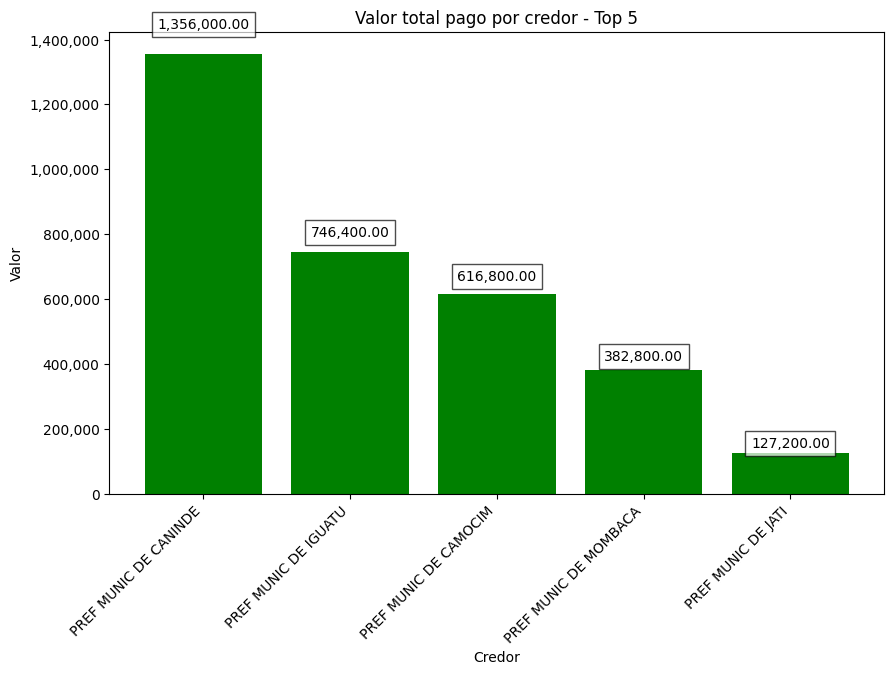

In [27]:
# Selecionar os top 5 credores
df_credor_pago_2 = df_credor_pago.head(5)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(df_credor_pago_2['descricao_nome_credor'], df_credor_pago_2['calculated_valor_pago'], color='green')

# Adicionando o valor em cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05 * yval, f'{yval:,.2f}', 
             ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Adicionando títulos e rótulos
plt.title('Valor total pago por credor - Top 5')
plt.xlabel('Credor')
plt.ylabel('Valor')

# Formatar os valores do eixo y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Melhorando a visualização
plt.xticks(rotation=45, ha='right', fontsize=10)

graf_credor_pago = 'grafico_credor_pago.png'
plt.savefig(graf_credor_pago)
plt.show()
plt.close()


In [28]:
# Certificar que 'calculated_valor_pago' é numérico
dados_concatenados['valor_contrato'] = pd.to_numeric(dados_concatenados['valor_contrato'], errors='coerce')

# Agrupar e somar os valores
df_valor_contrato = dados_concatenados.groupby('descricao_nome_credor')['valor_contrato'].sum().reset_index()

# Ordenar o DataFrame pelo valor pago de forma descendente
df_valor_contrato = df_valor_contrato.sort_values(by='valor_contrato', ascending=False)

# Criar uma nova coluna formatada para exibição
df_valor_contrato['valor_total_contrato'] = df_valor_contrato['valor_contrato'].map(lambda x: f'{x:,.2f}')

df_valor_contrato_for = df_valor_contrato[['descricao_nome_credor', 'valor_total_contrato']]

# Verificar a formatação
df_valor_contrato_for.head()

,descricao_nome_credor,valor_total_contrato
19,D & L SERVIÇOS DE APOIO ADMINISTRATIVO LTDA,"18,327,266.52"
93,SYSMEDICA COMERCIO DE MATERIAIS HOSPITALARES LTDA,"2,948,032.80"
78,PREF MUNIC DE CANINDE,"2,260,000.00"
80,PREF MUNIC DE IGUATU,"1,244,000.00"
61,MASTERMEDIC COMERCIO DE PROD.MED. HOSPITALARES...,"1,128,000.00"


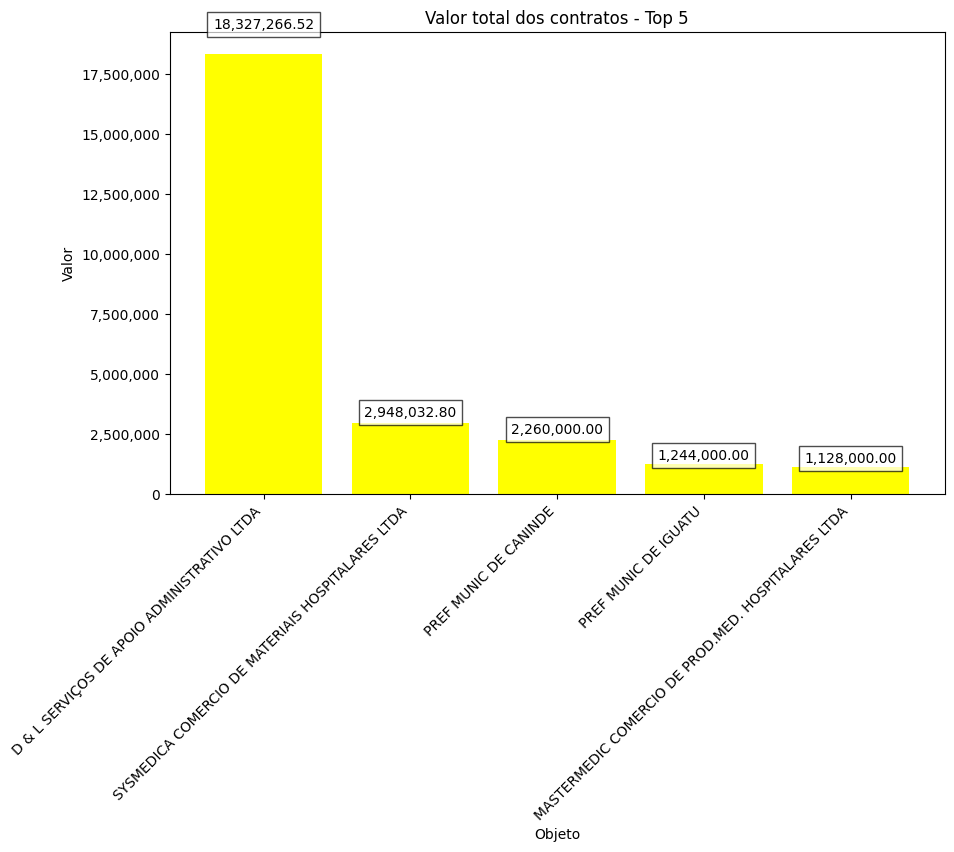

In [29]:
df_valor_contrato_2 = df_valor_contrato.head(5)

#Criando o grafico barras
plt.figure(figsize=(10,6))
bars = plt.bar(df_valor_contrato_2['descricao_nome_credor'], df_valor_contrato_2['valor_contrato'].round(2), color='yellow')
2
#Adicionando o valor em cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05*yval, f'{yval:,.2f}', 
             ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

#Adicionando titulos e rotulos
plt.title('Valor total dos contratos - Top 5')
plt.xlabel('Objeto')
plt.ylabel('Valor')

# Formatar os valores do eixo y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

#Melhorando a visualização
plt.xticks(rotation=45, ha='right', fontsize=10)

graf_valor_contrato_2 = 'grafico_credor_contrato.png'
plt.savefig(graf_valor_contrato_2)
plt.show()
plt.close()

In [30]:
# Certificar que 'calculated_valor_pago' é numérico
dados_concatenados['valor_contrato'] = pd.to_numeric(dados_concatenados['calculated_valor_empenhado'], errors='coerce')

# Agrupar e somar os valores
df_tipo_objeto = dados_concatenados.groupby('tipo_objeto')['calculated_valor_empenhado'].sum().reset_index()

# Ordenar o DataFrame pelo valor pago de forma descendente
df_tipo_objeto = df_tipo_objeto.sort_values(by='calculated_valor_empenhado', ascending=False)

# Criar uma nova coluna formatada para exibição
df_tipo_objeto['valor_empenhado'] = df_tipo_objeto['calculated_valor_empenhado'].map(lambda x: f'{x:,.2f}')

df_tipo_objeto_for = df_tipo_objeto[['tipo_objeto', 'valor_empenhado']]

# Verificar a formatação
df_tipo_objeto_for.head()


,tipo_objeto,valor_empenhado
5,Outros,"4,913,808.75"
1,Gêneros Alimentícios,"288,021.20"
4,Obras e Serviços de Engenharia,"100,000.00"
0,"Aquisição de Móveis, Máquinas e Equipamentos (...","43,541.13"
3,Material de Limpeza,"16,369.10"


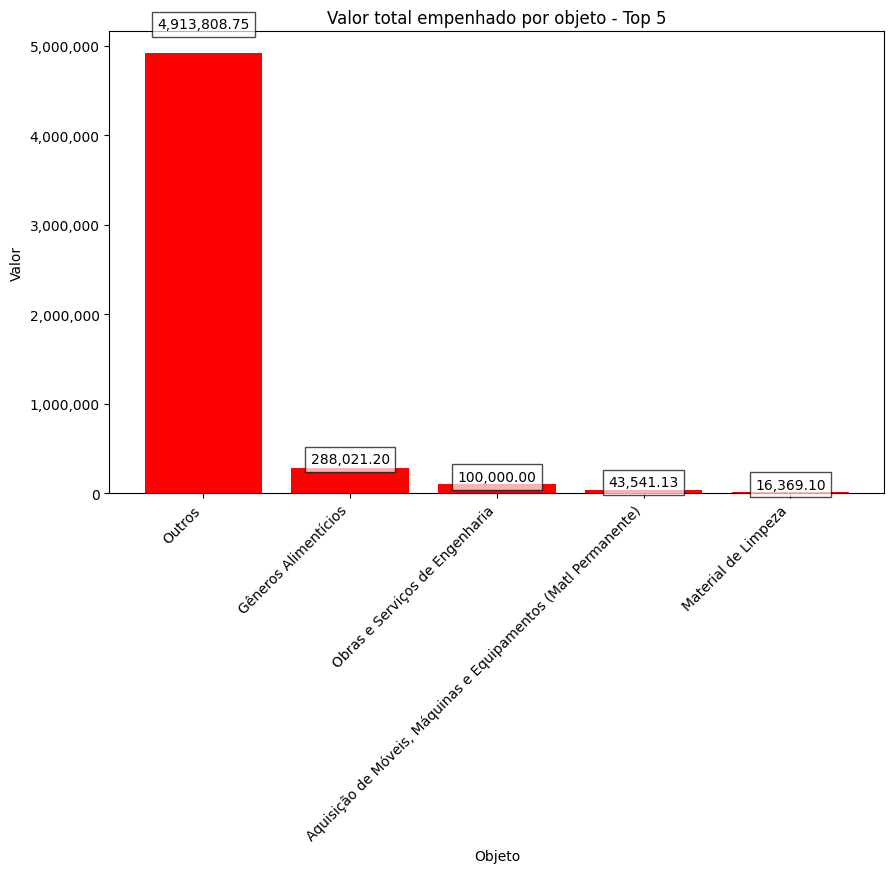

In [31]:
df_tipo_objeto_2 = df_tipo_objeto.head(5)

#Criando o grafico barras
plt.figure(figsize=(10,6))
bars = plt.bar(df_tipo_objeto_2['tipo_objeto'], df_tipo_objeto_2['calculated_valor_empenhado'].round(2), color='red')

#Adicionando o valor em cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05*yval, f'{yval:,.2f}', 
             ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

#Adicionando titulos e rotulos
plt.title('Valor total empenhado por objeto - Top 5')
plt.xlabel('Objeto')
plt.ylabel('Valor')

# Formatar os valores do eixo y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

#Melhorando a visualização
plt.xticks(rotation=45, ha='right', fontsize=10)

graf_tipo_objeto = 'grafico_tipo_objeto.png'
plt.savefig(graf_tipo_objeto)
plt.show()
plt.close()

In [32]:
# Certificar que 'calculated_valor_pago' é numérico
dados_concatenados['valor_contrato'] = pd.to_numeric(dados_concatenados['calculated_valor_empenhado'], errors='coerce')

# Agrupar e somar os valores
df_gestor = dados_concatenados.groupby('descricao_nome_credor')['calculated_valor_empenhado'].sum().reset_index()

# Ordenar o DataFrame pelo valor pago de forma descendente
df_gestor = df_gestor.sort_values(by='calculated_valor_empenhado', ascending=False)

# Criar uma nova coluna formatada para exibição
df_gestor['valor_empenhado'] = df_gestor['calculated_valor_empenhado'].map(lambda x: f'{x:,.2f}')

df_gestor_for = df_gestor[['descricao_nome_credor', 'valor_empenhado']]

# Verificar a formatação
df_gestor_for.head()


,descricao_nome_credor,valor_empenhado
78,PREF MUNIC DE CANINDE,"1,356,000.00"
80,PREF MUNIC DE IGUATU,"746,400.00"
77,PREF MUNIC DE CAMOCIM,"616,800.00"
97,UNI HOSPITALAR CEARA LTDA-EPP,"486,396.00"
83,PREF MUNIC DE MOMBACA,"382,800.00"


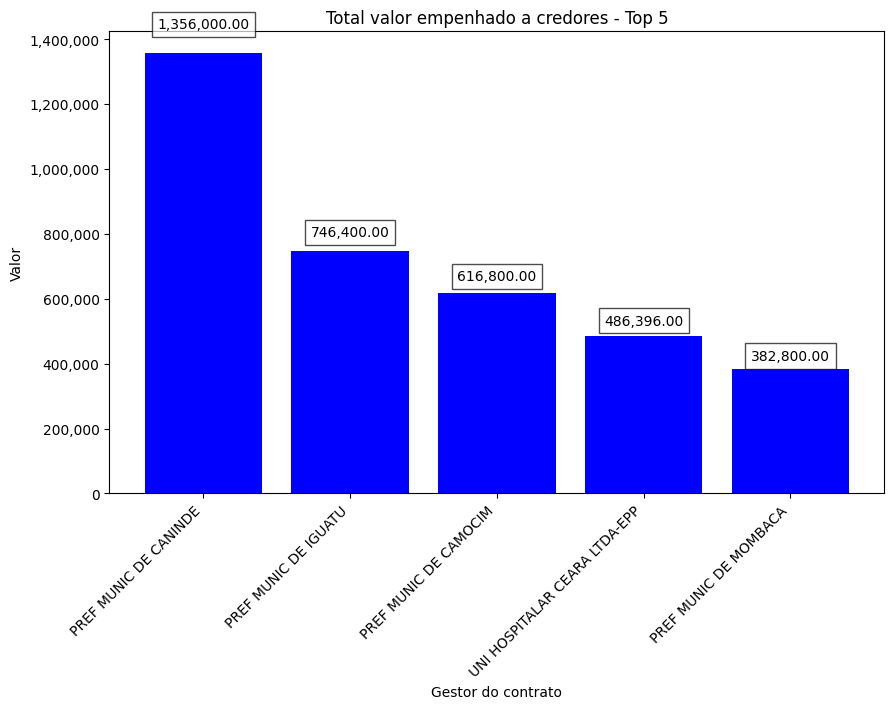

In [33]:
df_gestor_emp = df_gestor.head(5)

#Criando o grafico barras
plt.figure(figsize=(10,6))
bars = plt.bar(df_gestor_emp['descricao_nome_credor'], df_gestor_emp['calculated_valor_empenhado'].round(2), color='blue')

#Adicionando o valor em cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05*yval, f'{yval:,.2f}', 
             ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

#Adicionando titulos e rotulos
plt.title('Total valor empenhado a credores - Top 5')
plt.xlabel('Gestor do contrato')
plt.ylabel('Valor')

# Formatar os valores do eixo y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

#Melhorando a visualização
plt.xticks(rotation=45, ha='right', fontsize=10)

graf_gestor_emp = 'grafico_gestor_emp.png'
plt.savefig(graf_gestor_emp)
plt.show()
plt.close()

In [34]:
# Agrupar e somar os valores
df_gestor_2 = dados_concatenados.groupby('descricao_nome_credor')[['calculated_valor_empenhado', 'calculated_valor_pago']].sum().reset_index()

# Ordenar o DataFrame pelo valor empenhado de forma descendente
df_gestor_2 = df_gestor_2.sort_values(by='calculated_valor_empenhado', ascending=False)

# Criar novas colunas formatadas para exibição
df_gestor_2['valor_empenhado'] = df_gestor_2['calculated_valor_empenhado'].map(lambda x: f'{x:,.2f}')
df_gestor_2['valor_pago'] = df_gestor_2['calculated_valor_pago'].map(lambda x: f'{x:,.2f}')

# Selecionar apenas as colunas formatadas para exibição
df_gestor_2_for = df_gestor_2[['descricao_nome_credor', 'valor_empenhado', 'valor_pago']]

# Verificar a formatação
df_gestor_2_for.head(5)

,descricao_nome_credor,valor_empenhado,valor_pago
78,PREF MUNIC DE CANINDE,"1,356,000.00","1,356,000.00"
80,PREF MUNIC DE IGUATU,"746,400.00","746,400.00"
77,PREF MUNIC DE CAMOCIM,"616,800.00","616,800.00"
97,UNI HOSPITALAR CEARA LTDA-EPP,"486,396.00",0.00
83,PREF MUNIC DE MOMBACA,"382,800.00","382,800.00"


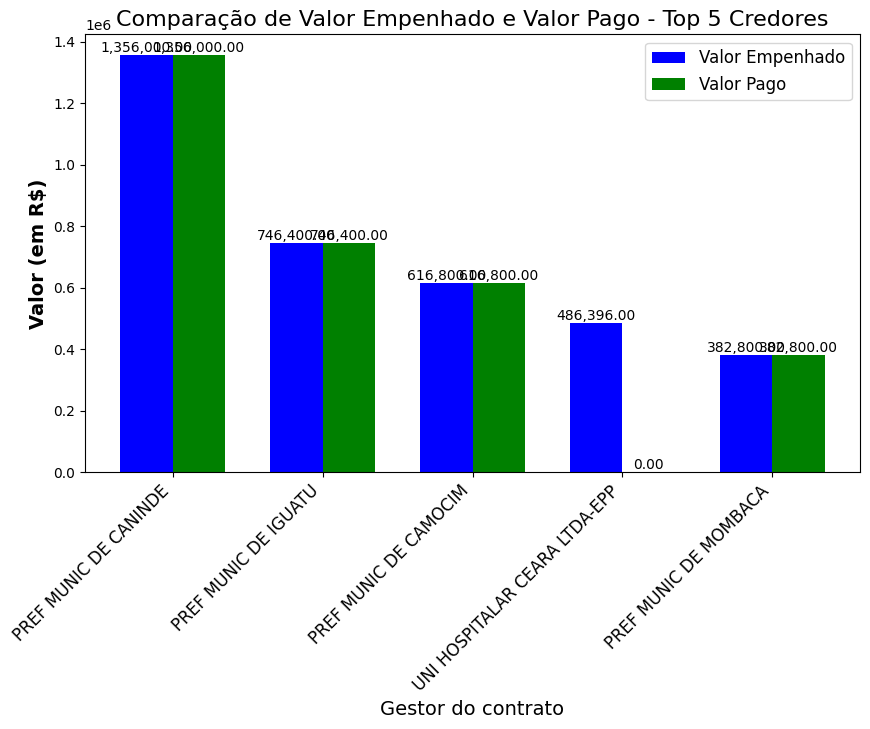

In [35]:
# Ordenando e selecionando os top 5 gestores
df_gestor_total = df_gestor_2.head(5)

# Criando o gráfico de barras agrupadas
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(df_gestor_total))

bars1 = plt.bar(index, df_gestor_total['calculated_valor_empenhado'], bar_width, label='Valor Empenhado', color='blue')
bars2 = plt.bar([i + bar_width for i in index], df_gestor_total['calculated_valor_pago'], bar_width, label='Valor Pago', color='green')

# Adicionando os valores no topo das barras com formatação
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:,.2f}', va='bottom', ha='center', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:,.2f}', va='bottom', ha='center', fontsize=10)

plt.xlabel('Gestor do contrato', fontsize=14)
plt.ylabel('Valor (em R$)', fontsize=14, fontweight='bold')
plt.title('Comparação de Valor Empenhado e Valor Pago - Top 5 Credores', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], df_gestor_total['descricao_nome_credor'], rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.subplots_adjust(bottom=0.15)

graf_gestor_total = 'grafico_gestor.png'
plt.savefig(graf_gestor_total)
plt.show()
plt.close()


In [36]:
df_tipo = dados_concatenados['descricao_tipo'].value_counts()

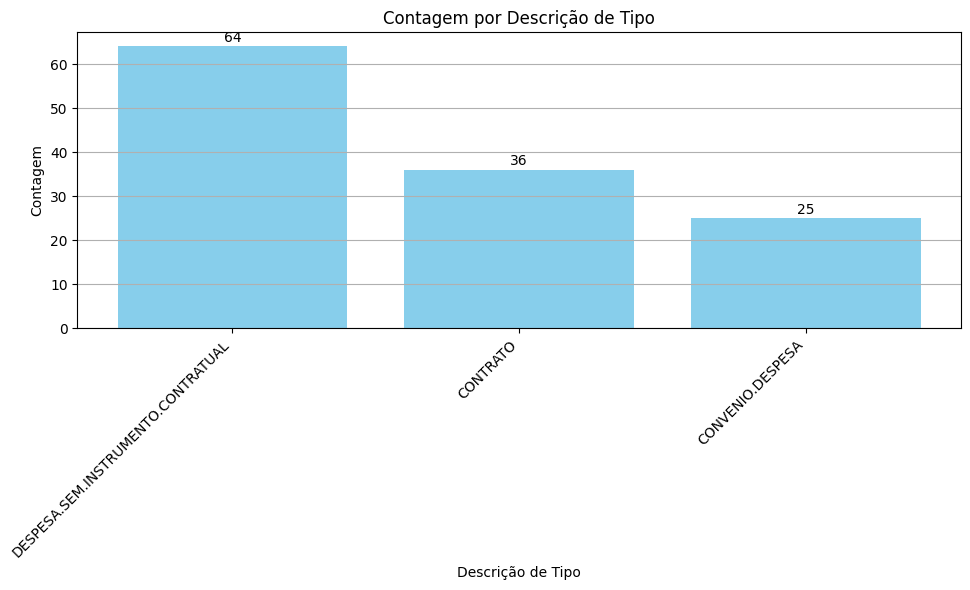

In [37]:
# Dados para o gráfico
descricao_tipo = df_tipo.index
contagem = df_tipo.values

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(descricao_tipo, contagem, color='skyblue')
plt.xlabel('Descrição de Tipo')
plt.ylabel('Contagem')
plt.title('Contagem por Descrição de Tipo')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Adicionando o número da contagem acima de cada barra
for bar, count in zip(bars, contagem):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, count,
             ha='center', va='bottom', fontsize=10)

# Mostrando o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes de texto
graf_desc_tipo = 'grafico_tipo.png'
plt.savefig(graf_desc_tipo)
plt.show()
plt.close()

In [38]:
# Contar a quantidade de credores para cada gestor
credor_por_gestor = dados_concatenados.groupby('gestor_contrato')['descricao_nome_credor'].nunique().reset_index()

# Renomeando as colunas para algo mais significativo
credor_por_gestor.columns = ['Gestor', 'Quantidade de Credores']

# Ordenar os gestores pelo número de credores em ordem decrescente
credor_por_gestor = credor_por_gestor.sort_values(by='Quantidade de Credores', ascending=False)

# Selecionar os 5 gestores com o maior número de credores
top_5_gestores = credor_por_gestor.head(5)
top_5_gestores

,Gestor,Quantidade de Credores
4,ANTONIO LIMA ALVES,2
8,CELIA MARIA OLIVEIRA ROSA SOARES,2
20,LIDUINA MARIA DA SILVA,2
0,ADRIANA GOMES EVANGELISTA,1
17,JOSE ARIMATEA GONCALVES,1


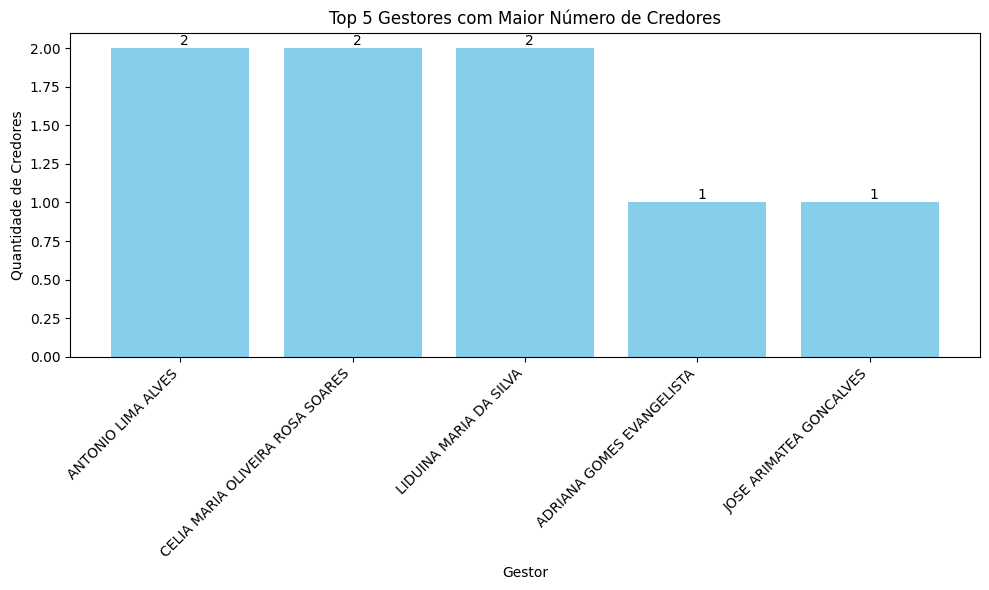

In [39]:
# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_gestores['Gestor'], top_5_gestores['Quantidade de Credores'], color='skyblue')

# Adicionar os valores em cada coluna
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.xlabel('Gestor')
plt.ylabel('Quantidade de Credores')
plt.title('Top 5 Gestores com Maior Número de Credores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

graf_top_gestores = 'grafico_top_gestor.png'
plt.savefig(graf_top_gestores)
plt.show()
plt.close()

In [40]:
# Converter a coluna data_inicio para o formato de data e extrair o ano, ignorando datas inválidas
dados_concatenados['data_inicio'] = pd.to_datetime(dados_concatenados['data_inicio'], errors='coerce')
dados_concatenados['ano_inicio'] = dados_concatenados['data_inicio'].dt.year

# Remover linhas onde a data foi convertida para NaT (valores inválidos)
dados_concatenados = dados_concatenados.dropna(subset=['data_inicio'])

# Agrupar os dados por ano e calcular os valores totais pagos e empenhados
df_ano_total = dados_concatenados.groupby('ano_inicio').agg({'calculated_valor_empenhado': 'sum', 'calculated_valor_pago': 'sum'}).reset_index()

# Adicionar colunas com os valores formatados
df_ano_total['Valor Empenhado Formatado'] = df_ano_total['calculated_valor_empenhado'].apply(lambda x: f'R${x:,.2f}')
df_ano_total['Valor Pago Formatado'] = df_ano_total['calculated_valor_pago'].apply(lambda x: f'R${x:,.2f}')

df_ano_total_for = df_ano_total[['ano_inicio','Valor Empenhado Formatado','Valor Pago Formatado']]
df_ano_total_for

,ano_inicio,Valor Empenhado Formatado,Valor Pago Formatado
0,2024,"R$5,361,740.18","R$3,954,556.00"


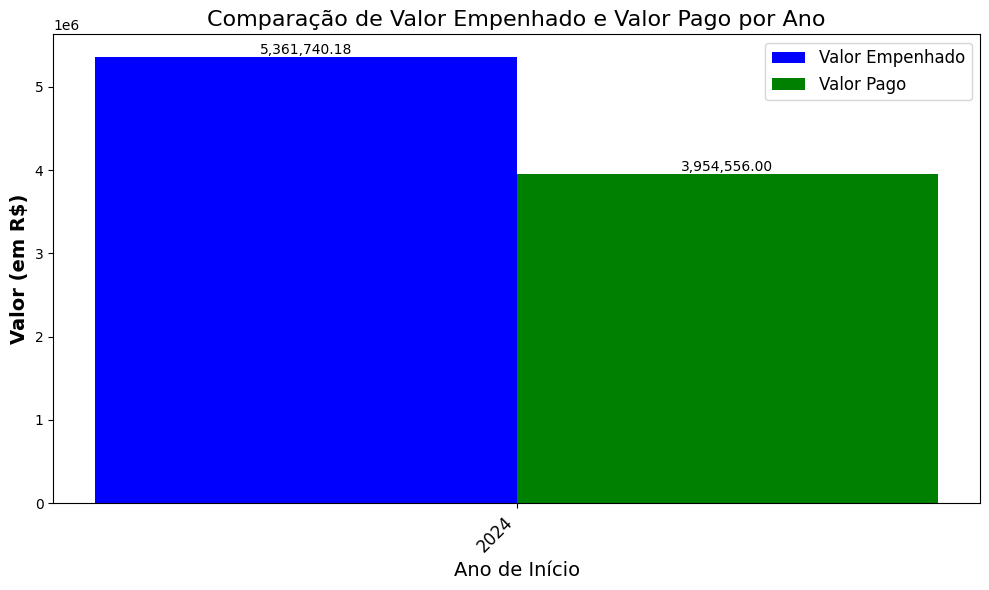

In [41]:
# Criar o gráfico de barras agrupadas
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(df_ano_total))

bars1 = plt.bar(index, df_ano_total['calculated_valor_empenhado'], bar_width, label='Valor Empenhado', color='blue')
bars2 = plt.bar([i + bar_width for i in index], df_ano_total['calculated_valor_pago'], bar_width, label='Valor Pago', color='green')

# Adicionar os valores no topo das barras com formatação
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:,.2f}', va='bottom', ha='center', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:,.2f}', va='bottom', ha='center', fontsize=10)

plt.xlabel('Ano de Início', fontsize=14)
plt.ylabel('Valor (em R$)', fontsize=14, fontweight='bold')
plt.title('Comparação de Valor Empenhado e Valor Pago por Ano', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], df_ano_total['ano_inicio'], rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Salvar e mostrar o gráfico
graf_ano_total = 'grafico_ano.png'
plt.savefig(graf_ano_total)
plt.show()
plt.close()

In [42]:
enviar_email([df_gestor_total, df_gestor_emp, df_credor_pago_2, df_tipo_objeto_2, df_valor_contrato_2, df_tipo, top_5_gestores, df_ano_total], [graf_gestor_total, graf_gestor_emp, graf_credor_pago, graf_tipo_objeto, graf_valor_contrato_2, graf_desc_tipo, graf_top_gestores, graf_ano_total])

E-mail enviado com sucesso!
